### 1. Wczytywanie danych z pliku .data który ma strukturę CSV

In [1]:
import csv
import json
import pandas
import numpy as np
with open("../baza_danych/letter-recognition.data") as filename:
    template=csv.reader(filename)
    letter_dataframe = pandas.DataFrame(template)

### 2. Podział zbioru danych na treningowy i testowy.
Parametry podziału (proporcje) powinny być konfigurowalne.
Ilość próbek w całym datasecie: 20000
rozkład klas w całym zbiorze:<br>
 	789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G<br>
 	734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N<br>
 	753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U<br>
 	764 V	   752 W     787 X     786 Y	 734 Z

In [2]:
# tutaj będzie podzial zbioru na test i train ? ale nie wiem do końca co tu mają być za parametry
how_much_test = 1500
how_much_train = 1500
train = pandas.DataFrame(letter_dataframe.tail(how_much_train))
test = letter_dataframe.head(how_much_test)

print(test)
print(train)


     0  1   2  3  4  5   6   7  8  9   10  11  12 13  14 15  16
0     T  2   8  3  5  1   8  13  0  6   6  10   8  0   8  0   8
1     I  5  12  3  7  2  10   5  5  4  13   3   9  2   8  4  10
2     D  4  11  6  8  6  10   6  2  6  10   3   7  3   7  3   9
3     N  7  11  6  6  3   5   9  4  6   4   4  10  6  10  2   8
4     G  2   1  3  1  1   8   6  6  6   6   5   9  1   7  5  10
...  .. ..  .. .. .. ..  ..  .. .. ..  ..  ..  .. ..  .. ..  ..
1495  T  4   8  6  6  5   6   8  7  7   8   7   8  3  10  6   9
1496  I  3   6  4  4  2   7   7  0  7  13   6   8  0   8  1   7
1497  N  3   3  5  2  2   7   9  3  4  10   6   6  5   9  1   7
1498  D  4   6  5  5  5   7   7  5  6   7   5   9  4   6  6   5
1499  X  4  11  6  8  6   6   7  2  7   7   7  10  6   5  8   7

[1500 rows x 17 columns]
      0  1   2   3  4  5  6   7  8  9   10  11  12  13  14 15 16
18500  M  8  10  12  8  9  4   8  3  5  10  10  10  13   8  5  8
18501  P  3   6   4  4  2  7  11  7  3  11   5   3   1  10  4  7
18502  V  8

### 3. Wstępna analiza danych.
Ile jest próbek każdej klasy, ile jest cech, czy dane są znormalizowane, czy wymagają normalizacji, czy
są inne czynności jakie należy wykonać, statystyki (tylko istotne - takie które wpływają na dalsze
kroki).



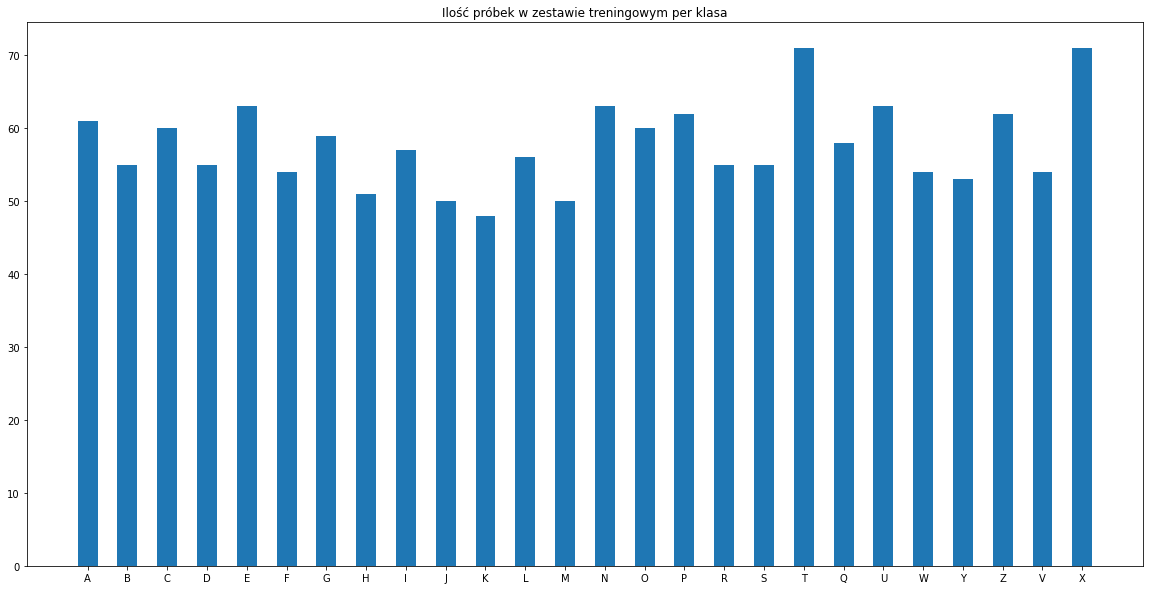

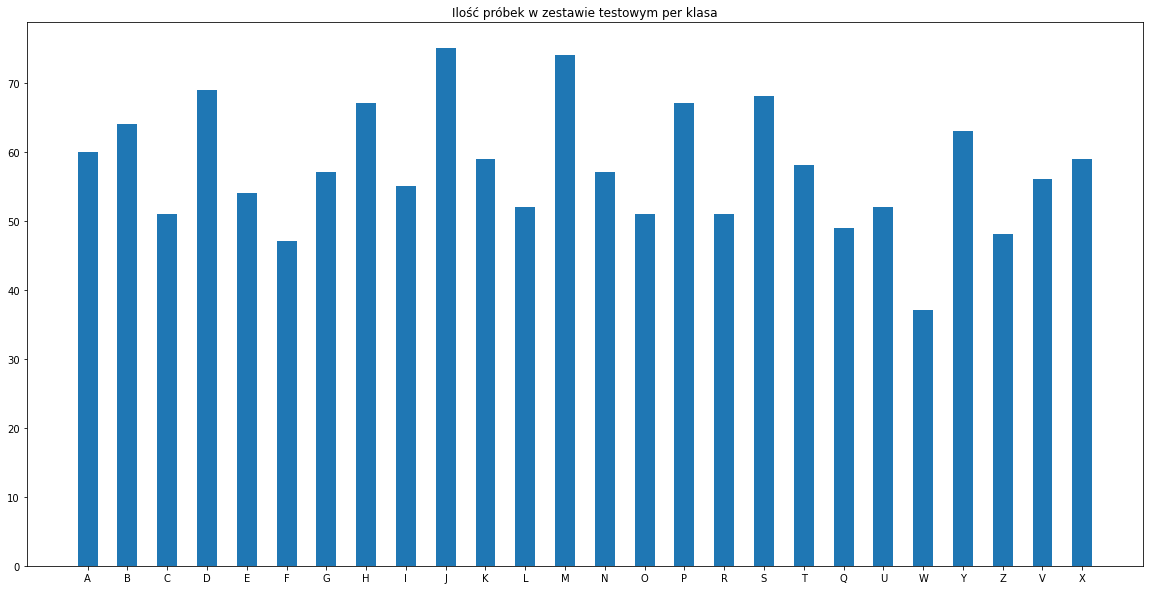

In [3]:
# analiza danych

how_many_train_elements_by_class = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'R':0,'S':0,'T':0,'Q':0,'U':0,'W':0,'Y':0,'Z':0, 'V':0, 'X':0}
how_many_test_elements_by_class = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'R':0,'S':0,'T':0,'Q':0,'U':0,'W':0,'Y':0,'Z':0, 'V':0, 'X':0}
for element in train.to_numpy():
    how_many_train_elements_by_class[element[0]]+=1
for element in test.to_numpy():
    how_many_test_elements_by_class[element[0]]+=1


# import json
# print("Rozkład próbek do uczenia (train): \n",json.dumps(how_many_train_elements_by_class, sort_keys=True, indent=4))
# print("Rozkład próbek do testowania (test): \n",json.dumps(how_many_test_elements_by_class, sort_keys=True, indent=4))

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # width:20, height:3

plt.bar(range(len(how_many_train_elements_by_class)), list(how_many_train_elements_by_class.values()), width=0.5)
plt.xticks(range(len(how_many_train_elements_by_class)), list(how_many_train_elements_by_class.keys()))
plt.title("Ilość próbek w zestawie treningowym per klasa")
plt.show()

plt.figure(figsize=(20, 10))  # width:20, height:
plt.bar(range(len(how_many_test_elements_by_class)), list(how_many_test_elements_by_class.values()), width=0.5)
plt.xticks(range(len(how_many_test_elements_by_class)), list(how_many_test_elements_by_class.keys()))
plt.title("Ilość próbek w zestawie testowym per klasa")
plt.show()

Próbki są bazowo w postaci nie wymagającej normalizacji<br>
Cech jest 16:
	 1.	litera	wielka litera (A-Z)
	 2.	x-box	pozioma pozycja boxa	(integer)
	 3.	y-box	pionowa pozycja boxa	(integer)
	 4.	width	szerokość boxa			(integer)
	 5.	high 	wysokość boxa			(integer)
	 6.	onpix	ilosc pikseli na obrazku		(integer)
	 7.	x-bar	średnia wartość x pixeli w boxie	(integer)
	 8.	y-bar	średnia wartość Y pixeli w boxie	(integer)
	 9.	x2bar	średnia rozbieżność wartości X 			(integer)
	10.	y2bar	średnia rozbieżność wartości Y			(integer)
	11.	xybar	średnia wartość korelacji X i Y		(integer)
	12.	x2ybr	średnia wartosć x * x * y  		(integer)
	13.	xy2br	średnia wartosć x * y * y		(integer)
	14.	x-ege	średnia ilość krawędzi licząc od lewej do prawej	(integer)
	15.	xegvy	korelacja krawędzi x z y	(integer)
	16.	y-ege	Średnia ilość krawędzi od dołu do góry	(integer)
	17.	yegvx	korelacja krawędzi y z x	(integer)


### 4. Wstępne przetworzenie danych (preprocessing).
Normalizacja danych,
podział zbioru treningowego na treningowy i walidacyjny,
usunięcie błędnych danych.

In [4]:
# Normalizacja danych nie jest wymagana ponieważ wartości są już znomralizowane
# przez dostawcę danych i wszystkie wartości wynoszą między 0 a 15 (integer)

# zamiana 1 kolumny na liczbę a pozostałych z stringa na inta ponieważ dane są wczytywane na poczatku jako stringi
train[0] = train[0].astype("category").cat.codes
test[0] = test[0].astype("category").cat.codes
for i in train.columns:
    train.loc[:,i]  = pandas.to_numeric(train.loc[:,i],errors='ignore')
for i in test.columns:
    test.loc[:,i]  = pandas.to_numeric(test.loc[:,i],errors='ignore')

train = train.dropna()
test = test.dropna()

split = int(len(train)/2)
subtrain_train = train.tail(split)
subtrain_validation = train.head(split)
print(subtrain_validation)


       0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
18500  12   8  10  12   8   9   4   8   3   5  10  10  10  13   8   5   8
18501  15   3   6   4   4   2   7  11   7   3  11   5   3   1  10   4   7
18502  21   8  12   6   7   3   8  10   5   5   8  10   5   5  12   3   7
18503  21   5  10   5   8   4   3  11   2   3   9  11   8   3  10   1   7
18504   6   7  10   9   8   9   9   4   6   3   8   5  10  11   6   5   8
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19245  22   4   8   7   6   6   7  11   2   2   6   8   8   7  12   1   8
19246  22   3   8   5   6   4   9  10   2   2   6   8   8   7  11   1   8
19247  11   4   8   5   7   5   8   5   5   5   7   7   8   3   8   7  11
19248  19   3   4   4   2   1   5  13   3   6  12   9   3   1  10   1   5
19249  25   3   8   4   6   3   7   8   3  11   8   6   8   0   8   7   7

[750 rows x 17 columns]


<ipython-input-4-087ead8527f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[0] = test[0].astype("category").cat.codes
D:\miniconda\envs\smpd\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### 5. Selekcja cech.
Opis jakie metody selekcji cech zastosowano, dlaczego wybrano taką metodę a nie inną


In [5]:
#selekcja cech
from skfeature.function.similarity_based import fisher_score

labels = ['litera', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr',
          'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
labelsnumpy = np.array(labels)

help = subtrain_train.to_numpy()


score = fisher_score.fisher_score(help, labelsnumpy)
scoreIndex = fisher_score.fisher_score(help, labelsnumpy, mode='index')
print(score)
print(scoreIndex)


[ 0  9 15 14 13 12 11 10 16  1  7  6  4  3  2  5  8]
[16  7  1  2  3  4  5  6  0 15  9 10 12 13 14 11  8]


D:\miniconda\envs\smpd\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:56: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0/lap_score - 1


###  6. Klasyfikacja.
Przeprowadź klasyfikację poznanymi metodami klasyfikacji:

NN:

ilość dobrze oznaczonych: 490
ilość wszystkich:750
procent dokładności: 65.33%


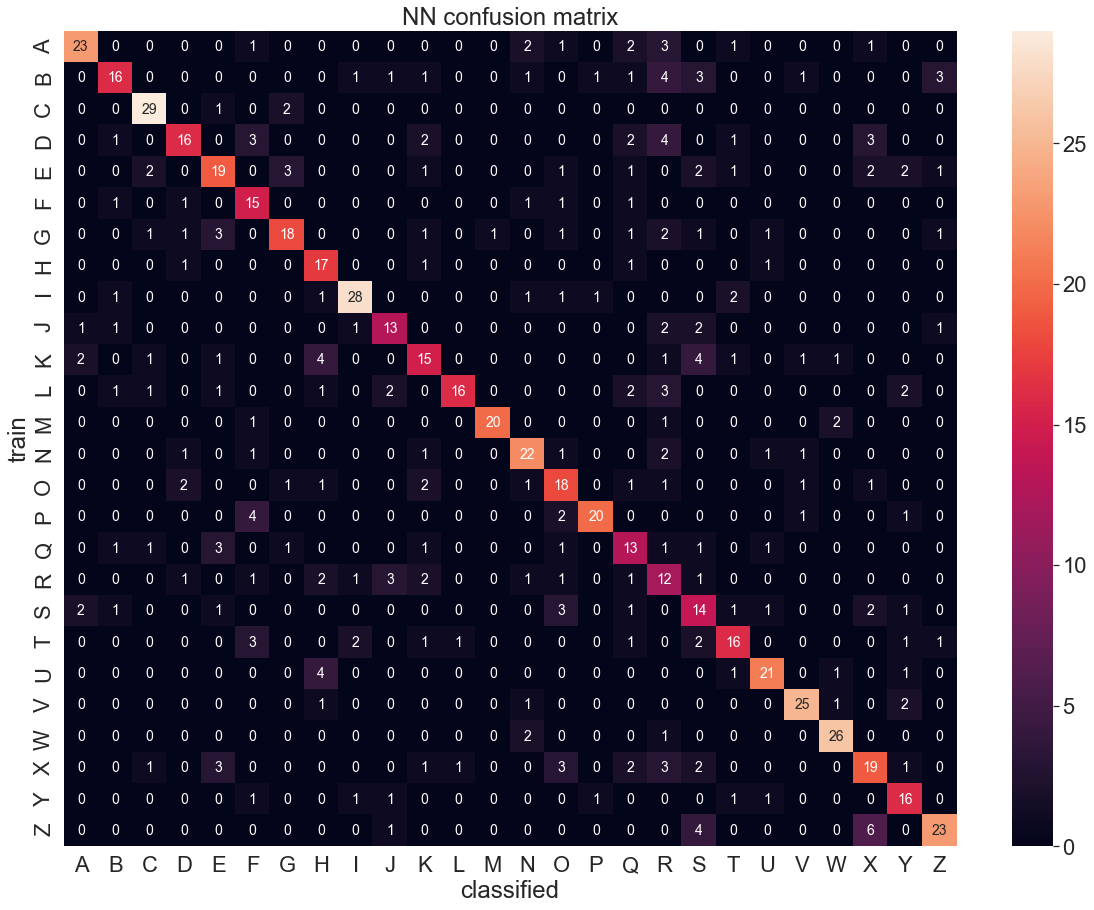

In [6]:
# to be edited with fisherscore
list_of_chosen_features = [9, 12, 13, 14, 15]

# simple euclidean distance taken from lab1
def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

# classify single example
# returns that example and classified class by algorythm
# as python pair (single_tested_example, selected_class)
def nn_classify(list_of_trained_examples, single_tested_example, list_of_chosen_features):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,list_of_chosen_features))
    mindist = min(temp_list)
    return single_tested_example, list_of_trained_examples[temp_list.index(mindist)][0]


list_of_classifed = []
subtrain_train_as_numpy = subtrain_train.to_numpy()
subtrain_validation_as_numpy = subtrain_validation.to_numpy()

for to_be_tested in subtrain_validation_as_numpy:
    list_of_classifed.append(nn_classify(subtrain_train_as_numpy,to_be_tested,list_of_chosen_features))

counter_of_matching = 0
for element in list_of_classifed:
    if int(element[0][0]) == element[1]:
        counter_of_matching+=1

accuracy = counter_of_matching/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter_of_matching.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")



# pretty printing as plot with confusion matrix
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix, zero_one_loss

conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=2) # for label size

plt.subplots(figsize=(20,15))
list_of_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, xticklabels=list_of_labels, yticklabels=list_of_labels) # font size # font size
plt.title("NN confusion matrix")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()

k-NN

ilość dobrze oznaczonych: 417
ilość wszystkich:750
procent dokładności: 55.60%


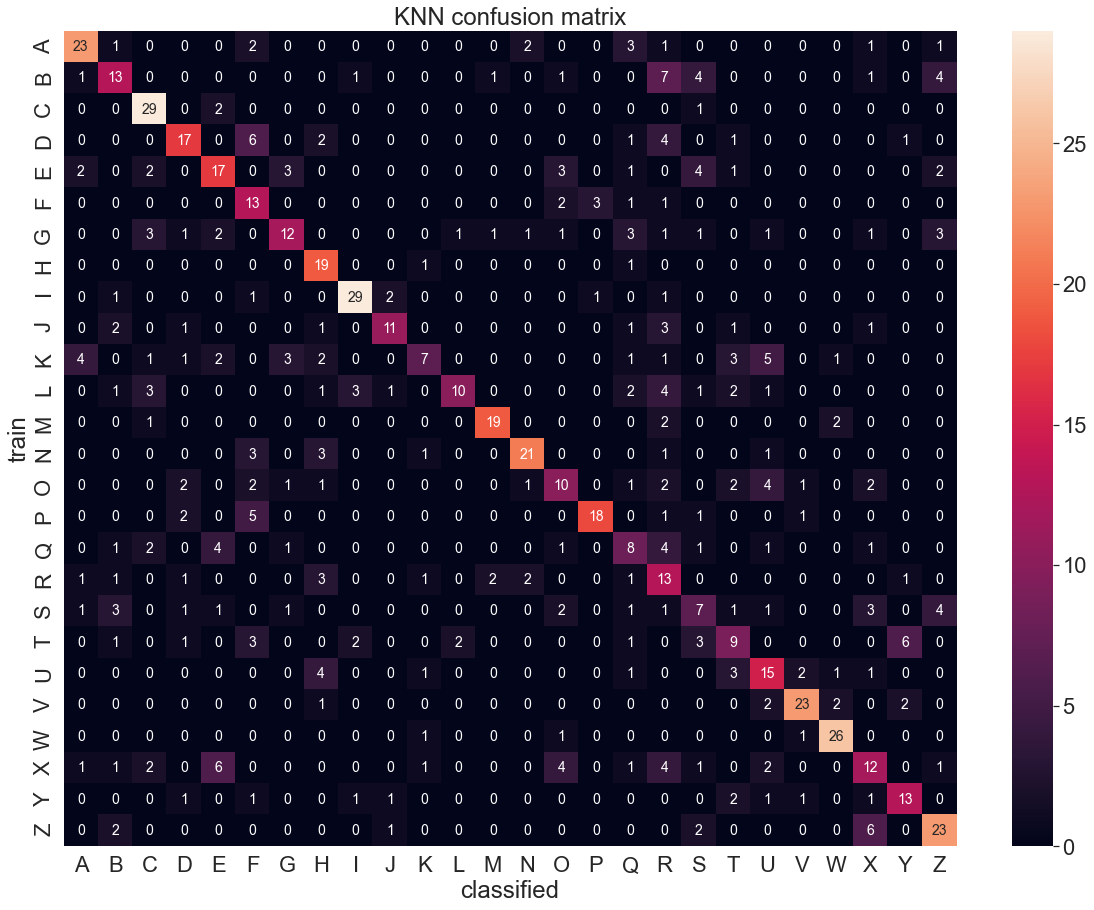

In [7]:
##########     k-NN
def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

def find_k_min(k,list_to_be_searched):
    sorted_list = sorted(list_to_be_searched)
    return sorted_list[:k]

def most_frequent(list_to_be_searched):
    return max(set(list_to_be_searched), key = list_to_be_searched.count)

def k_nearest_classify(list_of_distances, list_of_k_nearest, list_of_trained_examples):
    temp_list = []
    for dist in list_of_k_nearest:
        temp_list.append(list_of_distances.index(dist))
    k_nearest_list = []
    for element in temp_list:
        k_nearest_list.append(list_of_trained_examples[element][0])
    return most_frequent(k_nearest_list)

def k_classify(list_of_trained_examples, single_tested_example, k_nearest,list_of_characteristics):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,list_of_characteristics))
    list_of_k_nearest = find_k_min(k_nearest,temp_list)
    classified = k_nearest_classify(temp_list,list_of_k_nearest,list_of_trained_examples)
    return single_tested_example, classified



# list_of_characters =[2,3,4,5,6,7,8,10,11]
# list_of_classes = [3,5,6]

# for to_be_tested in selectedClassesTest:
#     list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,how_many_neighbours,list_of_characters))


how_many_neighbours = 5
list_of_classifed = []
for to_be_tested in subtrain_validation_as_numpy:
    list_of_classifed.append(k_classify(subtrain_train_as_numpy,to_be_tested,how_many_neighbours,list_of_chosen_features))


counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")


# pretty printing as plot with confusion matrix
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=2) # for label size

plt.subplots(figsize=(20,15))
list_of_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, xticklabels=list_of_labels, yticklabels=list_of_labels) # font size # font size
plt.title("KNN confusion matrix")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()




NM

ilość dobrze oznaczonych: 360
ilość wszystkich:750
procent dokładności: 48.00%


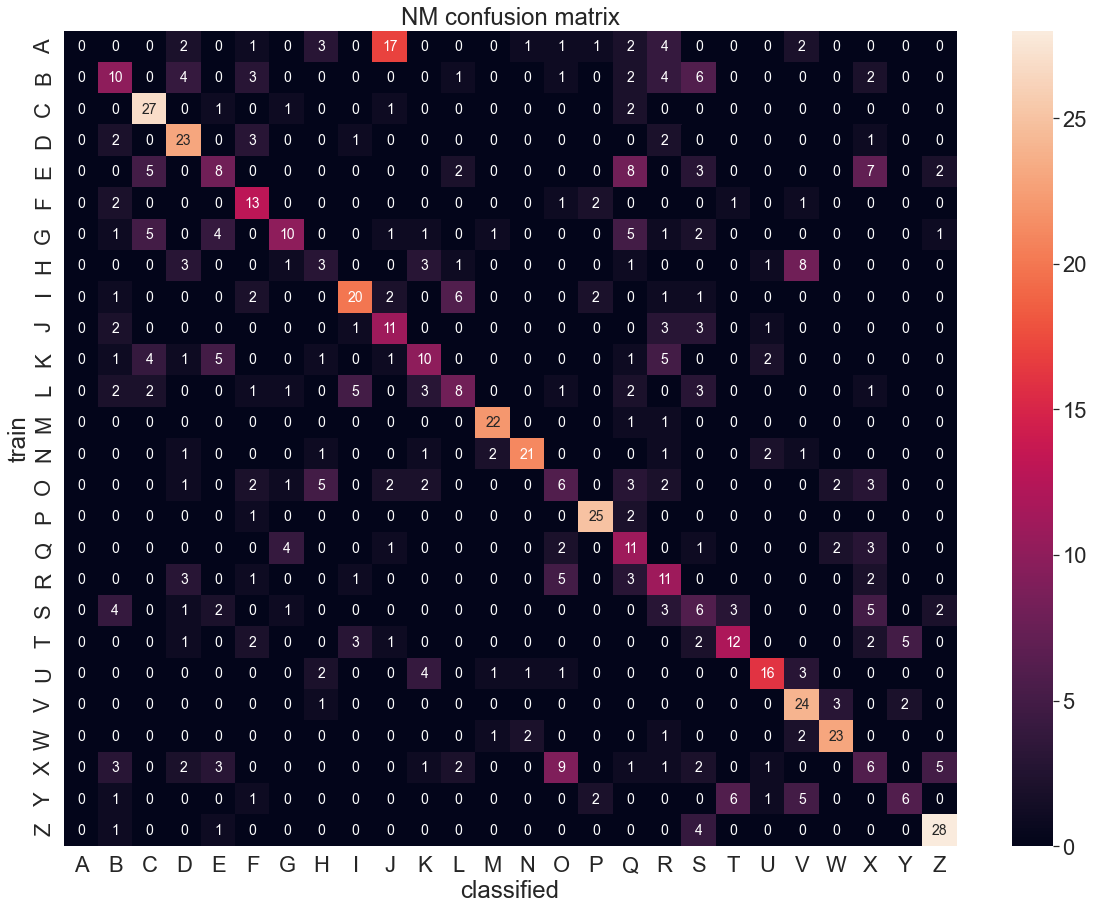

In [8]:
##########     NM

import pandas
import math
# sama funckja wyliczająca odległośc
def euclidean_NM(X,sred_klas,list_of_features ):
    result = []
    for a in sred_klas:
        sum = 0
        for j in list_of_features:
            sum += math.pow(a[j] - X[j], 2)
        result.append(math.sqrt(sum))
    return result
def find_k_min(k,list_to_be_searched):
    sorted_list = sorted(list_to_be_searched)
    return sorted_list[:k]

def most_frequent(list_to_be_searched):
    return max(set(list_to_be_searched), key = list_to_be_searched.count)

def nm_classify(list_of_trained_examples, single_tested_example, wybrane_cechy):
    distances = euclidean_NM(single_tested_example,list_of_trained_examples,wybrane_cechy)
    mindist = min(distances)
    return single_tested_example, distances.index(mindist)+1



# przygotowanie średnich wartości dla każdej klasy


train_dataframe =  pandas.DataFrame(train)
sred_class = np.zeros((26,17))
for i in range(0,26):
    temp = train_dataframe[train_dataframe[0] == i+1]
    for j in range(0,17):
        sred_class[i][j] = temp.iloc[:, j].mean()


#classification
list_of_classifed = []
for i in subtrain_validation_as_numpy:
    list_of_classifed.append(nm_classify(sred_class,i,list_of_chosen_features))

#printing
counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

# pretty printing as plot with confusion matrix
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=2) # for label size

plt.subplots(figsize=(20,15))
list_of_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, xticklabels=list_of_labels, yticklabels=list_of_labels) # font size # font size
plt.title("NM confusion matrix")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()


k-NM

ilość dobrze oznaczonych: 247
ilość wszystkich:750
procent dokładności: 32.93%


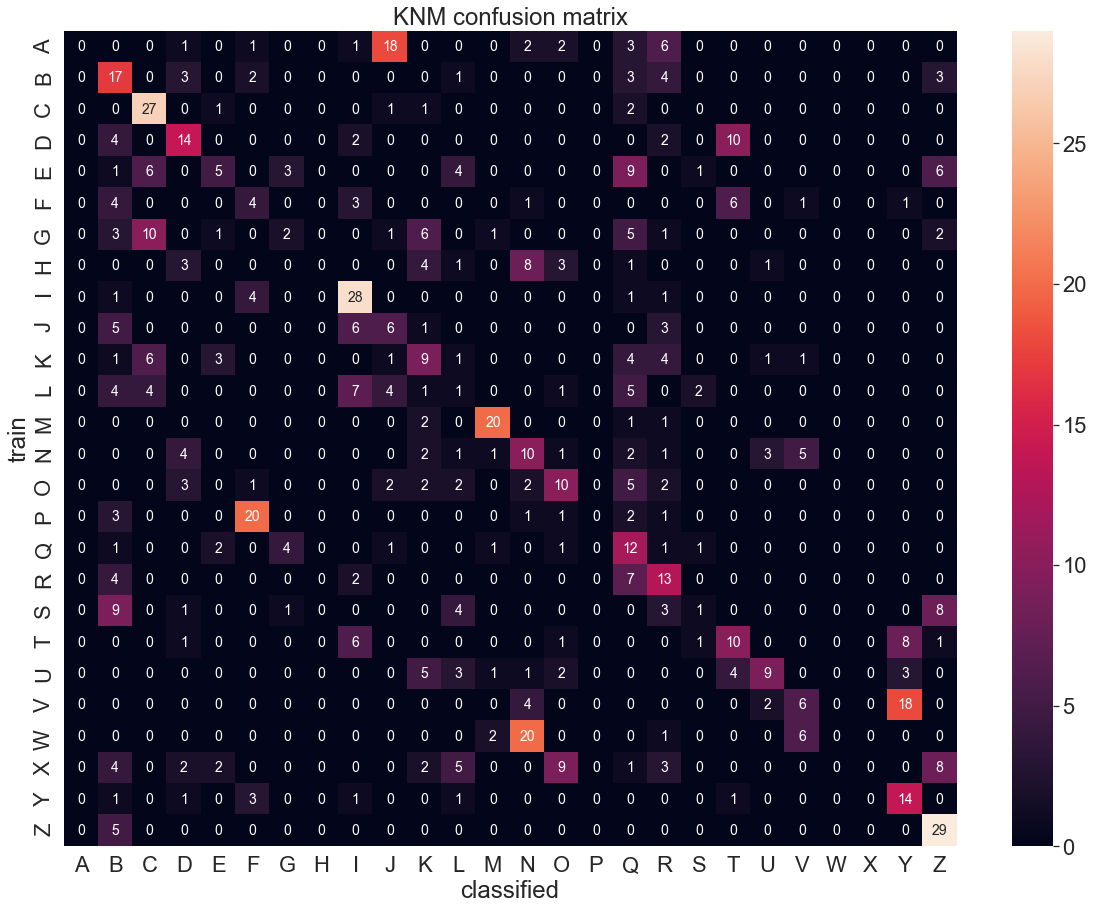

In [9]:
##########     k-NM

import pandas
import math
# sama funckja wyliczająca odległośc
def euclidean_NM(X,sred_klas,list_of_features ):
    result = []
    for a in sred_klas:
        sum = 0
        for j in list_of_features:
            sum += math.pow(a[j] - X[j], 2)
        result.append(math.sqrt(sum))
    return result

def find_k_min(k,list_to_be_searched):
    sorted_list = sorted(list_to_be_searched)
    return sorted_list[:k]

def most_frequent(list_to_be_searched):
    return max(set(list_to_be_searched), key = list_to_be_searched.count)

def assign_most_frequent_class(list_of_distances, list_of_k_nearest, list_of_trained_examples):
    temp_list = []
    for dist in list_of_k_nearest:
        temp_list.append(list_of_distances.index(dist))
    k_nearest_list = []
    for element in temp_list:
        k_nearest_list.append(list_of_trained_examples[element][0])
    return most_frequent(k_nearest_list)

def knm_classify(classes_mean, single_tested_example,k_nearest, list_of_chosen_features):
    distances = euclidean_NM(single_tested_example,classes_mean,list_of_chosen_features)
    list_of_k_nearest = find_k_min(k_nearest,distances)
    classified = assign_most_frequent_class(distances,list_of_k_nearest,classes_mean)
    return single_tested_example, classified


# przygotowanie średnich wartości dla każdej klasy
train_dataframe =  pandas.DataFrame(train)
how_many_neighbours = 2
sred_class = np.zeros((26,17))
for i in range(0,26):
    temp = train_dataframe[train_dataframe[0] == i+1]
    for j in range(0,17):
        sred_class[i][j] = temp.iloc[:, j].mean()


#classification
list_of_classifed = []
for i in subtrain_validation_as_numpy:
    list_of_classifed.append(knm_classify(sred_class,i,how_many_neighbours,list_of_chosen_features))

#printing
counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

# pretty printing as plot with confusion matrix
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=2) # for label size

plt.subplots(figsize=(20,15))
list_of_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, xticklabels=list_of_labels, yticklabels=list_of_labels) # font size font size
plt.title("KNM confusion matrix")
plt.ylabel("train")
plt.xlabel("classified")
plt.show()


Metodą wybraną do testowania jest NN ponieważ osiągnęla najlepsze wyniki dla zbioru walidacyjnego i treningowego

Najgorzej wypadła metoda K-NM jest to prawdopodobnie spowodowane strukutrą danych które są podawane do klasyfikatora.
Przez to, że każda cecha ma wartości z zakresu <0-15> to średnie są między sobą bardzo podobne co wpływa na ilość błędów
popełnianych przez klasyfikator.

### 7. Przetestuj wybrane modele na zbiorze testowym.
Wykonaj analizę i przedstaw wyniki badań.


D:\miniconda\envs\smpd\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:56: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0/lap_score - 1


[16  7  1  2  3  4  5  6  8 15 10 11 12 13 14  0  9]
ilość dobrze oznaczonych: 960
ilość wszystkich:1500
procent dokładności: 64.00%


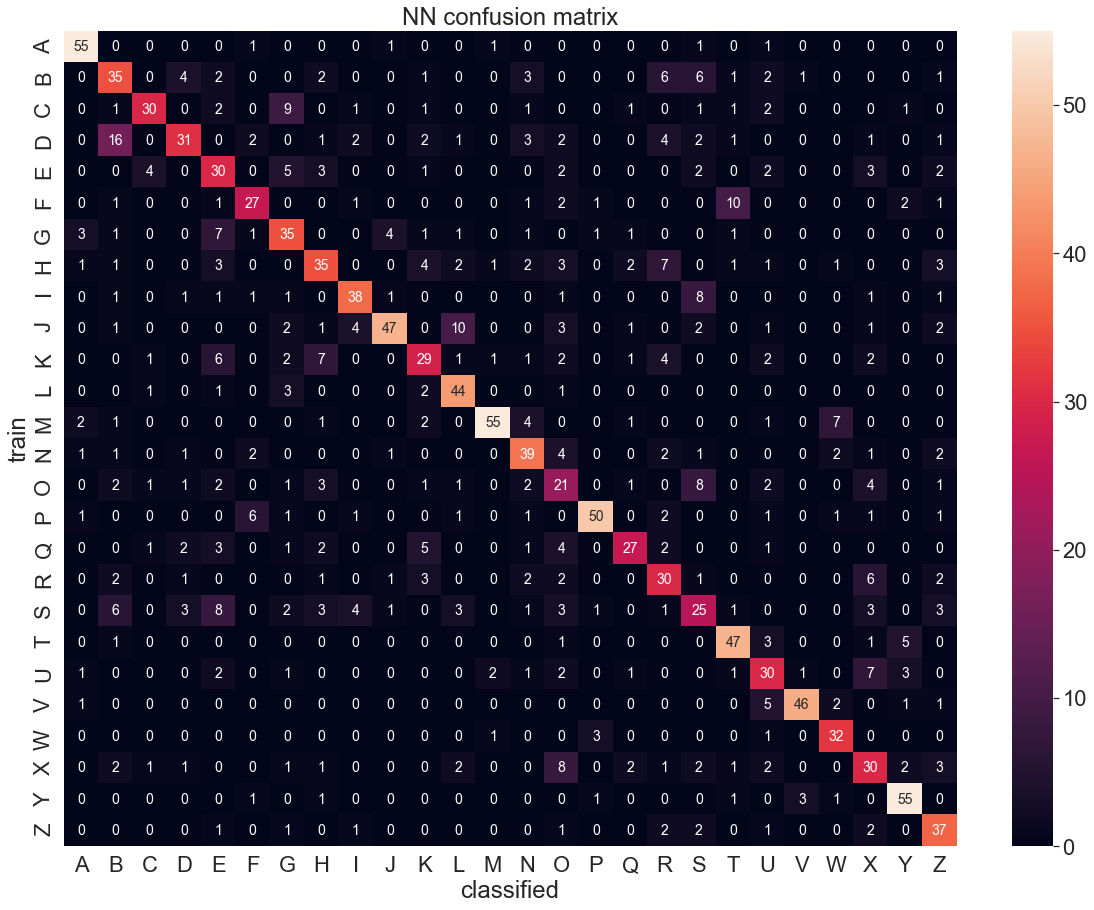

In [10]:
scoreIndex = fisher_score.fisher_score(train.to_numpy(), labelsnumpy, mode='index')
print(scoreIndex)

list_of_chosen_features = [9, 11, 12, 13, 14]

# simple euclidean distance taken from lab1
def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

# classify single example
# returns that example and classified class by algorythm
# as python pair (single_tested_example, selected_class)
def nn_classify(list_of_trained_examples, single_tested_example, list_of_chosen_features):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,list_of_chosen_features))
    mindist = min(temp_list)
    return single_tested_example, list_of_trained_examples[temp_list.index(mindist)][0]


list_of_classifed = []
subtrain_train_as_numpy = subtrain_train.to_numpy()
subtrain_validation_as_numpy = subtrain_validation.to_numpy()

for to_be_tested in test.to_numpy():
    list_of_classifed.append(nn_classify(train.to_numpy(),to_be_tested,list_of_chosen_features))

counter_of_matching = 0
for element in list_of_classifed:
    if int(element[0][0]) == element[1]:
        counter_of_matching+=1

accuracy = counter_of_matching/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter_of_matching.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")



# pretty printing as plot with confusion matrix
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix, zero_one_loss

conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=2) # for label size

plt.subplots(figsize=(20,15))
list_of_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, xticklabels=list_of_labels, yticklabels=list_of_labels) # font size
plt.title("NN confusion matrix")
plt.ylabel("train")
plt.xlabel("classified")
# plt.xticks([range(0,26)], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.show()


### 8. Wnioski.

Dzięki algorytmowi NN udało się zaklasyfikować ponad połowę danych testowych.
Algorytm ten jest jednak kosztowny pod względem obliczeń i w porównaniu z innymi algorytmami
wykonuje się najdłużej. Podając większy zbiór trenigowy algorytm prawidłowo zaklasyfikował więcej
próbek testowych.

